In [6]:
# Description
# 
# This program scrapes the Washington State wiki page for the state's climate data.
# The data is then loaded into a data frame and used to create bar graphs for the high and low temps.

In [22]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [23]:

url = 'https://en.wikipedia.org/wiki/Climate_of_New_Jersey'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html.read())

In [24]:
# get the 'wikitable collapsible' table, store it in variable
table = soup.find('table', class_='wikitable collapsible')

# print contents of the table
print(table.prettify())

<table class="wikitable collapsible" style="width:100%; text-align:center; line-height: 1.2em; margin:auto;">
 <tbody>
  <tr>
   <th colspan="14">
    Climate data for Newark, New Jersey (
    <a href="/wiki/Newark_Liberty_International_Airport" title="Newark Liberty International Airport">
     Newark Liberty Int'l
    </a>
    ), 1981–2010 normals, extremes 1931–present
   </th>
  </tr>
  <tr>
   <th scope="row">
    Month
   </th>
   <th scope="col">
    Jan
   </th>
   <th scope="col">
    Feb
   </th>
   <th scope="col">
    Mar
   </th>
   <th scope="col">
    Apr
   </th>
   <th scope="col">
    May
   </th>
   <th scope="col">
    Jun
   </th>
   <th scope="col">
    Jul
   </th>
   <th scope="col">
    Aug
   </th>
   <th scope="col">
    Sep
   </th>
   <th scope="col">
    Oct
   </th>
   <th scope="col">
    Nov
   </th>
   <th scope="col">
    Dec
   </th>
   <th scope="col" style="border-left-width:medium">
    Year
   </th>
  </tr>
  <tr style="text-align: center;">
   <

In [25]:
# get the rows of the table by identifying 'tr' elements
rows = table.findAll('tr')

# iterate over rows to identify number of columns in each by identifying 'td' elements
for row in rows:
    column=row.find_all('td')
    print("Number of Columns:", len(column))

# iterate over rows to print contents of the cells
for row in rows:
    row_titles=row.find_all('th')
    column=row.find_all('td')
    print()
    print("Row", rows.index(row))
    for title in row_titles:
        print(title.get_text(' ', strip=True))
    for cell in column:
        print(cell.get_text(' ', strip=True))

Number of Columns: 0
Number of Columns: 0
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 1
Number of Columns: 1

Row 0
Climate data for Newark, New Jersey ( Newark Liberty Int'l ), 1981–2010 normals, extremes 1931–present

Row 1
Month
Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec
Year

Row 2
Record high °F (°C)
74 (23)
80 (27)
89 (32)
97 (36)
99 (37)
102 (39)
108 (42)
105 (41)
105 (41)
96 (36)
85 (29)
76 (24)
108 (42)

Row 3
Mean maximum °F (°C)
60.2 (15.7)
62.2 (16.8)
73.3 (22.9)
84.1 (28.9)
90.8 (32.7)
95.7 (35.4)
98.1 (36.7)
95.7 (35.4)
90.5 (32.5)
81.0 (27.2)
72.6 (22.6)
62.9 (17.2)
99.6 (37.6)

Row 4
Average high °F (°C)
38.8 (3.8)
42.3 (5.7)
50.7 (10.4)
62.0 (16.7)
72.1 (22.3)
81.5 (27.5)
86.0 (30.0)
84

In [26]:
# import regex library for operations to clean data
import re

# initialize empty lists to store data
periods = []
record_high_f = []
mean_maximum_f = []
average_high_f = []
average_low_f = []
mean_minumum_f = []
record_low_f = []
average_precipitation_in = []
record_high_c = []
mean_maximum_c = []
average_high_c = []
average_low_c = []
mean_minumum_c = []
record_low_c = []
average_precipitation_mm = []

# iterate over rows in table to sort data as needed
for row in rows:
    # pull out title information
    row_titles=row.find_all('th')
    # row 0 contains the title of the entire table
    if rows.index(row) == 0:
        for title in row_titles:
            table_title = title.get_text(' ', strip=True)
    # row 1 contains months and 'year' periods that are headers for data values
    elif rows.index(row) == 1:
        for title in row_titles:
            if row_titles.index(title) != 0:
                periods.append(title.get_text(' ', strip=True))
    # rows 2-8 contain data we want to get at in the columns and cells
    elif rows.index(row) <= 8:
        column=row.find_all('td')
        for cell in column:
            # get text from cell which contains both imperial and metric data -- metric in ( )
            temp_combined = cell.get_text(' ', strip=True)
            # split the data text on space character accordingly
            imperial, metric = temp_combined.split(' ')
            # remove metric value's parentheses
            metric = re.sub(r'[()]', '', metric)
            # clean up messy characters in both imperial and metric values to prep for float conversion
            imperial = imperial.replace(' ','').replace(',','').replace("−", "-")
            metric = metric.replace(' ','').replace(',','').replace("−", "-")
            # convert string data to float values
            imperial = float(imperial)
            metric = float(metric)
            # store imperial and metric values in appropriate lists, dependent on row
            if rows.index(row) == 2:
                record_high_f.append(imperial)
                record_high_c.append(metric)
            elif rows.index(row) == 3:
                mean_maximum_f.append(imperial)
                mean_maximum_c.append(metric)
            elif rows.index(row) == 4:
                average_high_f.append(imperial)
                average_high_c.append(metric)
            elif rows.index(row) == 5:
                average_low_f.append(imperial)
                average_low_c.append(metric)
            elif rows.index(row) == 6:
                mean_minumum_f.append(imperial)
                mean_minumum_c.append(metric)
            elif rows.index(row) == 7:
                record_low_f.append(imperial)
                record_low_c.append(metric)
            elif rows.index(row) == 8:
                average_precipitation_in.append(imperial)
                average_precipitation_mm.append(metric)
        
# TESTING PRINTS
# print(table_title)
# print(periods)
# print()

# print(record_high_f)
# print(record_high_c)
# print(mean_maximum_f)
# print(mean_maximum_c)
# print(average_high_f)
# print(average_high_c)
# print(average_low_f)
# print(average_low_c)
# print(mean_minumum_f)
# print(mean_minumum_c)
# print(record_low_f)
# print(record_low_c)
# print(average_precipitation_in)
# print(average_precipitation_mm)

In [27]:
# import pandas
import pandas as pd

# setup Dataframe df to store list data
df = pd.DataFrame(periods,columns=['Month'])
df['Record High °F'] = record_high_f
df['Record High °C'] = record_high_c
df['Mean Maximum °F'] = mean_maximum_f
df['Mean Maximum °C'] = mean_maximum_c
df['Average High °F'] = average_high_f
df['Average High °C'] = average_high_c
df['Average Low °F'] = average_low_f
df['Average Low °C'] = average_low_c
df['Mean Minimum °F'] = mean_minumum_f
df['Mean Minimum °C'] = mean_minumum_c
df['Record Low °F'] = record_low_f
df['Record Low °C'] = record_low_c
df['Average Precipitation (in)'] = average_precipitation_in
df['Average Precipitation (mm)'] = average_precipitation_mm

months_only = df.drop([12])

# display DataFrame df
months_only

,Month,Record High °F,Record High °C,Mean Maximum °F,Mean Maximum °C,Average High °F,Average High °C,Average Low °F,Average Low °C,Mean Minimum °F,Mean Minimum °C,Record Low °F,Record Low °C,Average Precipitation (in),Average Precipitation (mm)
0,Jan,74.0,23.0,60.2,15.7,38.8,3.8,31.6,-0.2,24.5,-4.2,7.8,-13.4,-8.0,-22.0
1,Feb,80.0,27.0,62.2,16.8,42.3,5.7,34.6,1.4,26.9,-2.8,11.8,-11.2,-14.0,-26.0
2,Mar,89.0,32.0,73.3,22.9,50.7,10.4,42.1,5.6,33.6,0.9,17.9,-7.8,6.0,-14.0
3,Apr,97.0,36.0,84.1,28.9,62.0,16.7,52.8,11.6,43.7,6.5,31.8,-0.1,16.0,-9.0
4,May,99.0,37.0,90.8,32.7,72.1,22.3,62.7,17.1,53.3,11.8,42.4,5.8,33.0,1.0
5,Jun,102.0,39.0,95.7,35.4,81.5,27.5,72.4,22.4,63.3,17.4,52.4,11.3,41.0,5.0
6,Jul,108.0,42.0,98.1,36.7,86.0,30.0,77.4,25.2,68.7,20.4,60.5,15.8,51.0,11.0
7,Aug,105.0,41.0,95.7,35.4,84.0,28.9,75.8,24.3,67.5,19.7,57.8,14.3,45.0,7.0
8,Sep,105.0,41.0,90.5,32.5,76.7,24.8,68.2,20.1,59.7,15.4,47.2,8.4,35.0,2.0
9,Oct,96.0,36.0,81.0,27.2,65.3,18.5,56.6,13.7,48.0,8.9,36.0,2.2,25.0,-4.0


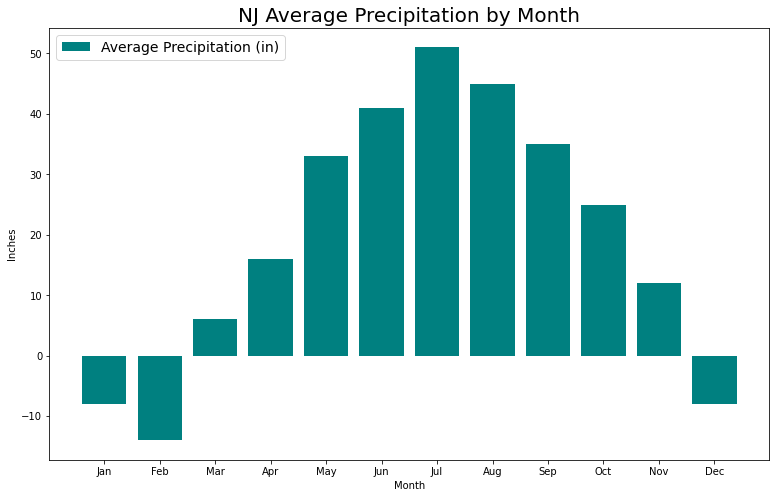

In [28]:


# figure setup
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.bar(range(0,len(months_only["Average Precipitation (in)"])), 
        months_only["Average Precipitation (in)"],
        label="Average Precipitation (in)",
        linewidth=5,
        color='teal')

# unneeded line plot
# ax.plot(df["Average Precipitation (in)"], label="Average Precipitation (in)", linestyle="-.")

# xticks setup
xtick_range = range(0,len(months_only))
xtick_labels = periods
plt.xticks(ticks=xtick_range, labels=xtick_labels)

# title and legend
plt.title("NJ Average Precipitation by Month", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels
plt.xlabel("Month")
plt.ylabel("Inches")

# display plot
plt.show()

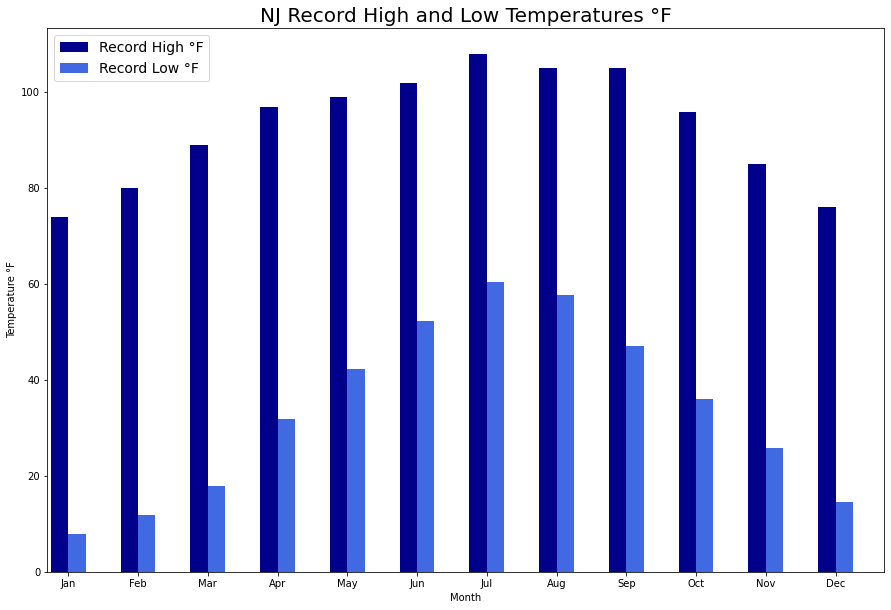

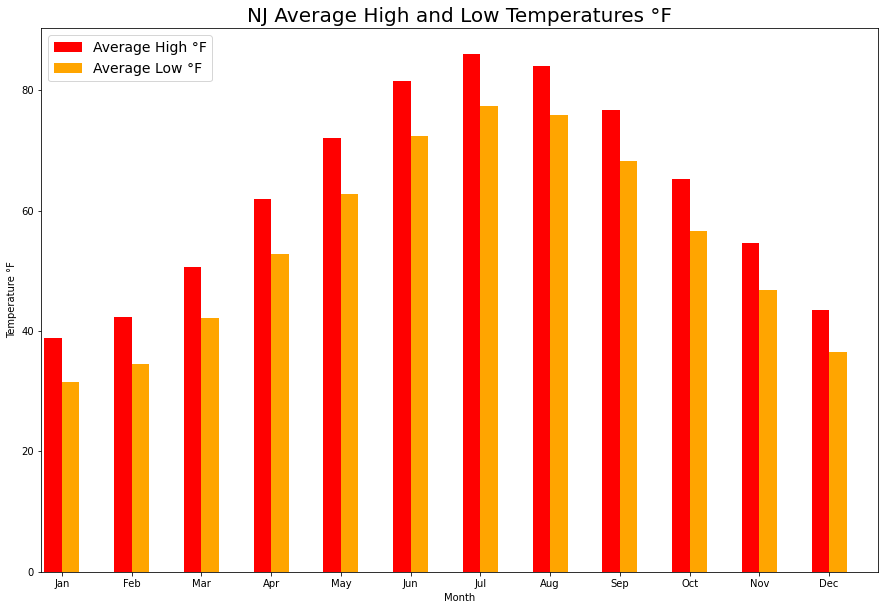

In [29]:
# RECORD HIGH AND LOW TEMPS
weight = .30

# setup plot
months_only[["Record High °F", "Record Low °F"]].plot(kind="bar", color = ["darkblue", "royalblue"], figsize=(15,10))

# setup xticks
plt.xticks(range(0,len(months_only["Record High °F"])),months_only["Month"], rotation = 0)

# title and legend
plt.title("NJ Record High and Low Temperatures °F", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels, formatting
plt.xlabel("Month")
plt.ylabel("Temperature °F")
plt.xlim(-weight, len(months_only["Record High °F"])-weight)

# display plot
plt.show()

# AVERAGE HIGH AND LOW TEMPS

# setup plot
months_only[["Average High °F", "Average Low °F"]].plot(kind="bar", color = ["red", "orange"], figsize=(15,10))

# setup xticks
plt.xticks(range(0,len(months_only["Record High °F"])),months_only["Month"], rotation = 0)

# title and legend
plt.title("NJ Average High and Low Temperatures °F", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels, formatting
plt.xlabel("Month")
plt.ylabel("Temperature °F")
plt.xlim(-weight, len(months_only["Record High °F"])-weight)

# display plot
plt.show()

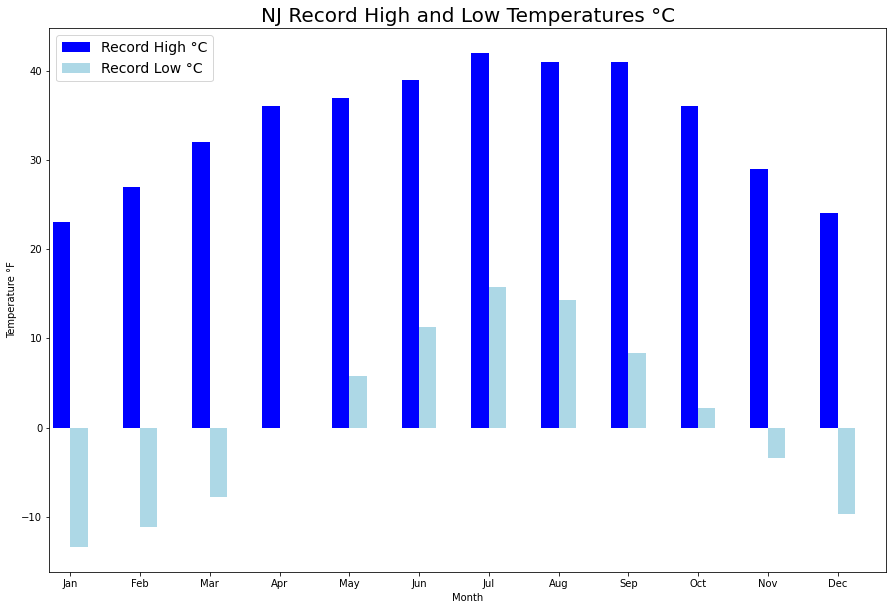

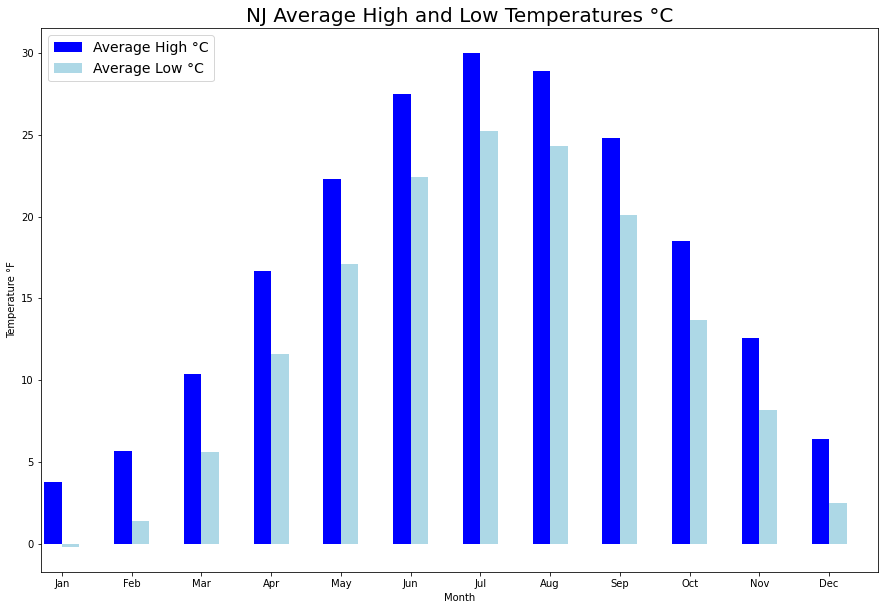

In [30]:
# RECORD HIGH AND LOW TEMPS
weight = .30

# setup plot
months_only[["Record High °C", "Record Low °C"]].plot(kind="bar", color = ["blue", "lightblue"], figsize=(15,10))

# setup xticks
plt.xticks(range(0,len(months_only["Record High °C"])),months_only["Month"], rotation = 0)

# title and legend
plt.title("NJ Record High and Low Temperatures °C", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels, formatting
plt.xlabel("Month")
plt.ylabel("Temperature °F")
plt.xlim(-weight, len(months_only["Record High °C"])-weight)

# display plot
plt.show()

# AVERAGE HIGH AND LOW TEMPS

# setup plot
months_only[["Average High °C", "Average Low °C"]].plot(kind="bar", color = [ "blue", "lightblue"], figsize=(15,10))

# setup xticks
plt.xticks(range(0,len(months_only["Record High °C"])),months_only["Month"], rotation = 0)

# title and legend
plt.title("NJ Average High and Low Temperatures °C", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels, formatting
plt.xlabel("Month")
plt.ylabel("Temperature °F")
plt.xlim(-weight, len(months_only["Record High °C"])-weight)

# display plot
plt.show()